In [25]:
from __future__ import print_function, division

import thinkdsp
import thinkplot

import numpy as np

import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

%matplotlib inline
PI2 = np.pi * 2

In [26]:
def synthesize1(amps, fs, ts):
    components = [thinkdsp.CosSignal(freq, amp)
                 for amp, freq in zip(amps, fs)]
    signal = thinkdsp.SumSignal(*components)
    
    ys = signal.evaluate(ts)
    return ys

1. synthesize1을 amp값과 주파수의값, 샘플링시간을 매개변수로 사용하여 선언
2. components변수에 cos시그널을 freq와 amp값을 이용하여 만들고 amp값과 fs값의 참조는 zip에서 함
3. signal변수에는 SumSignal을components를 이용하여 수행한 값을 저장
4. ys값에 signal변수를 ts로 evaluate한 값을 저장

In [27]:
amps = np.array([0.6, 0.25, 0.1, 0.05])
fs = [100, 200, 300, 400]
framerate = 11025

ts = np.linspace(0, 1, framerate)
ys = synthesize1(amps, fs, ts)
wave = thinkdsp.Wave(ys, ts, framerate)

1. amps값을 정의
2. fs값을 정의
3. framerate : ts의 크기를 정의
4. ts의 간격을 정의
5. ys에 synthesize1을 새로 정의한 amps, fs, ts값으로 다시 수행하여 ys에 저장
5. wave폼으로 변형

In [28]:
def synthesize2(amps, fs, ts):
    args = np.outer(ts, fs)
    M = np.cos(PI2 * args)
    ys = np.dot(M, amps)
    return ys

In [29]:
ys = synthesize2(amps, fs, ts)
wave = thinkdsp.Wave(ys, framerate)

In [40]:
ys1 = synthesize1(amps, fs, ts)
ys2 = synthesize2(amps, fs, ts)
max(abs(ys1-ys2))

1.2911893776390571e-13

In [42]:
def analyze1(ys, fs, ts):
    args = np.outer(ts, fs)
    M = np.cos(PI2 * args)
    amps = np.linalg.solve(M, ys)
    return amps

Using the first 4 values from the wave array, we can recover the amplitudes.

In [43]:
n = len(fs)
amps2 = analyze1(ys[:n], fs, ts[:n])
amps2

array([ 0.6 ,  0.25,  0.1 ,  0.05])

In [46]:
# suppress scientific notation for small numbers
np.set_printoptions(precision=3, suppress=True)

In [49]:
def test1():
    amps = np.array([0.6, 0.25, 0.1, 0.05])
    N = 4.0
    time_unit = 0.001
    ts = np.arange(N) / N * time_unit
    max_freq = N / time_unit / 2
    fs = np.arange(n) / N * max_freq
    args = np.outer(ts, fs)
    M = np.cos(PI2 * args)
    return M

M = test1()
M

array([[ 1.   ,  1.   ,  1.   ,  1.   ],
       [ 1.   ,  0.707,  0.   , -0.707],
       [ 1.   ,  0.   , -1.   , -0.   ],
       [ 1.   , -0.707, -0.   ,  0.707]])

1. test1을 정의
2. amps값에 배열로 값을 저장
3. N 은 주파수 성분의 갯수
4. time_unit은 사용자의 편의를 위한 작성
5. ts에 정한 주파수N번째를 N*0.001로 나누어서 저장
6. max_freq 에는 4 / 0.001 / 2의값을 저장
7. fs(주파수값)에는 주파수의 범위를 N*(4/0.001/2)의값으로 나누어서 저장
8. args에 outer연산한 값을 저장
9. 행렬M을 완성함( y = Ma를 이용)
10. M을 리턴하고 종료
11. M에 test1값을 저장
12. M은?

In [51]:
M.transpose().dot(M)

array([[ 4.,  1., -0.,  1.],
       [ 1.,  2.,  1.,  0.],
       [-0.,  1.,  2.,  1.],
       [ 1.,  0.,  1.,  2.]])

In [53]:
def test2():
    amps = np.array([0.6, 0.25, 0.1, 0.05])
    N = 4.0
    ts = (0.5 + np.arange(N)) / N
    fs = (0.5 + np.arange(N)) / 2
    args = np.outer(ts, fs)
    M = np.cos(PI2 * args)
    return M

M = test2()
M

array([[ 0.981,  0.831,  0.556,  0.195],
       [ 0.831, -0.195, -0.981, -0.556],
       [ 0.556, -0.981,  0.195,  0.831],
       [ 0.195, -0.556,  0.831, -0.981]])

Now $M^T M$ is $2I$ (approximately), so M is orthogonal except for a factor of two.

In [57]:
M.transpose().dot(M)

array([[ 2., -0.,  0.,  0.],
       [-0.,  2., -0., -0.],
       [ 0., -0.,  2., -0.],
       [ 0., -0., -0.,  2.]])

In [54]:
wave = thinkdsp.Wave(ys, ts, framerate)

In [55]:
def analyze2(ys, fs, ts):
    args = np.outer(ts, fs)
    M = np.cos(PI2 * args)
    amps = M.dot(ys) / 2
    return amps

In [56]:
n = len(fs)
amps = analyze1(ys[:n], fs, ts[:n])
amps2

array([ 0.6 ,  0.25,  0.1 ,  0.05])

In [58]:
def dct_iv(ys):
    N = len(ys)
    ts = (0.5 + np.arange(N)) / N
    fs = (0.5 + np.arange(N)) / 2
    args = np.outer(ts, fs)
    M = np.cos(PI2 * args)
    amps = np.dot(M, ys) / 2
    return amps

In [63]:
amps = np.array([0.6, 0.25, 0.1, 0.05])
N = 4.0
ts = (0.5 + np.arange(n)) / N
fs = (0.5 + np.arange(n)) / 2
ys = synthesize2(amps, fs, ts)

amps2 = dct_iv(ys)
print(max(abs(amps - amps2)))

8.32667268469e-17


In [64]:
def inverse_dct_iv(amps):
    return dct_iv(amps) * 2

In [65]:
amps = [0.6, 0.25, 0.1, 0.05]
ys = inverse_dct_iv(amps)
amps2 = dct_iv(ys)
max(abs(amps - amps2))

8.3266726846886741e-17

In [68]:
signal = thinkdsp.TriangleSignal(freq=400)
wave = signal.make_wave(duration=1.0, framerate=10000)
wave.make_audio()

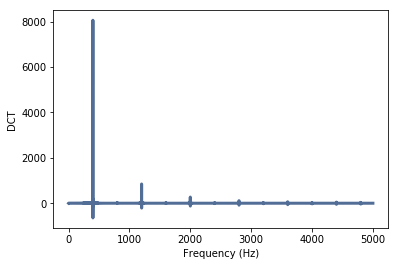

In [69]:
dct = wave.make_dct()
dct.plot()
thinkplot.config(xlabel='Frequency (Hz)', ylabel='DCT')

In [70]:
wave2 = dct.make_wave()

In [71]:
max(abs(wave.ys-wave2.ys))

8.8817841970012523e-16

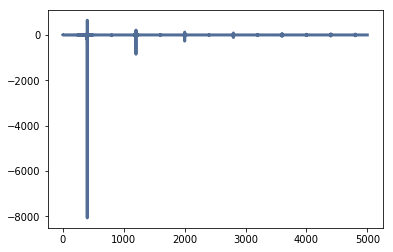

In [72]:
signal = thinkdsp.TriangleSignal(freq=400, offset =0)
wave = signal.make_wave(duration= 1.0, framerate=10000)
wave.ys *= -1
wave.make_dct().plot()

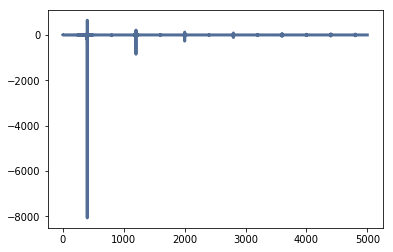

In [73]:
signal = thinkdsp.TriangleSignal(freq=400, offset=np.pi)
wave = signal.make_wave(duration=1.0, framerate=10000)
wave.make_dct().plot()

In [74]:
import scipy.fftpack

# class Wave:
def make_dct(self):
        N = len(self.ys)
        hs = scipy.fftpack.dct(self.ys, type=2)
        fs = (0.5 + np.arange(n)) / 2
        return Dct(hs, fs, self.framerate)

In [75]:
wave2 = dct.make_wave()
max(abs(wave.ys-wave2.ys))

2.0000000000000009